# Stochastic differential equations

Suggested references:

* C Gardiner, *Stochastic Methods: A Handbook for the Natural and Social Sciences*, Springer.
* D Higham, *An algorithmic introduction to Stochastic Differential Equations*, SIAM Review.

## Kostas Zygalakis

A differential equation (homogeneous) can be written in *differential form* as

\begin{equation}
  \frac{dX}{dt} = f(X)
\end{equation}

or in *integral form* as

\begin{equation}
  dX = f(X) \, dt.
\end{equation}

This has formal solution

\begin{equation}
  X(t) = X_0 + \int_0^t f(X(s)) \, ds.
\end{equation}

A *stochastic* differential equation can be written in *differential form* as

\begin{equation}
  \frac{dX}{dt} = f(X) + g(X) \frac{dW}{dt}
\end{equation}

or in *integral form* as

\begin{equation}
  dX = f(X) \, dt + g(X) dW.
\end{equation}

This has formal solution

\begin{equation}
  X(t) = X_0 + \int_0^t f(X(s)) \, ds + \int_0^t g(X(s)) \, dW_s.
\end{equation}

It is this final term that we need to know how to solve in order to compute the solution of an SDE.

### Toy problem

Remember that, for $a$ constant, the ODE

\begin{equation}
  \frac{dX}{dt} = aX
\end{equation}

has the solution $X(t) = X(0) e^{at}$ which, as $t \to \infty$, tends either to 0 (for $a < 0$) or to $+\infty$ (for a > 0).

##### Exercise

In order to think about existence and uniqueness of solutions, consider $f(X) = \sqrt{X}$ with $X(0) = 0$.

### Integrals

Two equivalent forms we can use:

\begin{align}
  X(t) &= X(0) + \int_0^t f(X(s)) \, ds, \\
  X(t+h) &= X(t) + \int_t^{t+h} f(X(s)) \, ds.
\end{align}

Now, graphically we can think about approximating the integral on $[t, t+h]$ by the minimum *or* maximum values of $f$ over the interval, multiplied by the width of the interval. Equivalently we could use the values at the start of the interval ($t$) or the end ($t+h$). This leads to the two approximate solutions

\begin{align}
  X(t+h) &\approx X(t) + h f(X(t)), \\
  X(t+h) &\approx X(t) + h f(X(t+h)).
\end{align}

In both cases the error is ${\cal O}(h^2)$.

The first method is the *explicit Euler* method: the second is the *implicit Euler* method. Written out in standard notation where $X_n \approx X(n h)$ we have

\begin{align}
  X_{n+1} &= X_n + h f(X_n), \\
  X_{n+1} &= X_n + h f(X_{n+1}),
\end{align}

for explicit and implicit Euler respectively.

Both Euler methods are first order in the sense that

\begin{equation}
  | X(T) - X^h(T) | \le C(T) h
\end{equation}

where $X^h$ is the numerical approximation from the method and $C(T)$ is a constant depending only on time.

#### Which method is better?

Implicit Euler allows you to take larger timesteps, particularly for *stiff* problems where $f$ varies rapidly. This is particularly important for SDEs where the Brownian motion does vary extremely rapidly.

### Limiting behaviour and discretization

The problem

\begin{equation}
  \frac{dX}{dt} = -b X, \quad b > 0
\end{equation}

has limiting value $\lim_{t \to +\infty} X(t) = 0$. 

Applying Euler's *explicit* method to this problem gives

\begin{align}
  && X_{n+1} &= X_n - b h X_n \\
  \implies && X_{n+1} &= (1 - bh) X_n
\end{align}

In order to get the correct limiting behaviour we will need $|1 - bh| < 1$. If $b \gg 1$ then this implies that $h$ will have to be very small.

If instead we use the *implicit* Euler method we get

\begin{align}
  && X_{n+1} &= X_n - b h X_{n+1} \\
  \implies && X_{n+1} &= \frac{1}{1 + bh} X_n
\end{align}

which results in the timestep requirement $|1 + bh| > 1$, which is always true for $h>0$ and $b>0$.

## Stochastic Differential Equations

Idea is that the process we're trying to model goes as

\begin{equation}
  \frac{dX}{ds} = ( a + \text{"error"} ) X(s), \quad X(0) = X_0.
\end{equation}

We want to include the error in our measurements, or uncertainty, using a stochastic term.

Our first assumption is that, over time, the error should average to zero.

We will write this problem as

\begin{equation}
  X(t, w) = X_0 + \int_0^t f(X(s, w))\, ds + \sigma W(t, w)  = X_0 + \int_0^t f(X(s, w))\, ds + \sigma \int_0^t dW(s, w) 
\end{equation}

Every time we solve this problem the function $W$ is going to be a new function, so we will get a different answer.

As the final term formally integrates to

\begin{equation}
  \sigma \int_0^t dW_s = \sigma ( W(t) - W(0) ),
\end{equation}

we need that $W(0) = 0$ to match our requirements.

##### Assumptions

1. $W(0, w) = 0$ ("no error accumulated at time 0").
2. $\mathbb{E} (W(t+h, w) - W(t, w)) = 0$ ("error averages to zero").
3. $W(t_2, w) - W(t_1, w)$ is independent of $W(s_2, w) - W(s_1, w)$ for all times $s_1 < s_2 < t_1 < t_2$, where independent $X, Y$ means that $\mathbb{E}(XY) = \mathbb{E}(X) \mathbb{E}(Y)$.

Quick reminder: if $X$ is a random variable that can take values in $(-\infty, +\infty)$, then it has probability distribution function $f(x)$ if the probability of it taking value less than $\gamma$ is

\begin{equation}
  \mathbb{P}(X < \gamma) = \int_{-\infty}^{\gamma} f(x) \, dx.
\end{equation}

Then the expectation value of $X$ is

\begin{equation}
  \mathbb{E}(X) = \int_{-\infty}^{\infty} x f(x) \, dx.
\end{equation}

The point then is that the various assumptions imply that $W(t+h) - W(t)$ depends on $h$, but **only** on $h$.

### Brownian motion

Definition follows the assumptions above:

1. $W(0) = 0$.
2. $W(t) - W(s) \sim N(0, |t - s|)$.
3. $\text{Cov}(W(t), W(s)) = \mathbb{E} \left[ ( W(t) - \mathbb{E}(W(t)) ) ( W(s) - \mathbb{E}(W(s)) ) \right] = \min\{s, t\}$.

Now let's generate this explicitly.

In [4]:
import numpy

T = 1.0
h = 0.01
N = int(T/h)
t = numpy.linspace(0.0, T, N)

dW = numpy.sqrt(h)*numpy.random.randn(N)
W = numpy.cumsum(dW)
W = W - W[0]

<IPython.core.display.Javascript object>


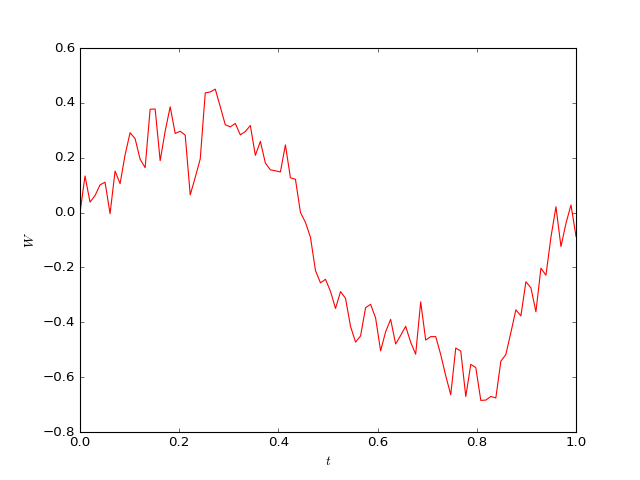

In [6]:
%matplotlib notebook
from matplotlib import pyplot

pyplot.plot(t, W, 'r')
pyplot.xlabel(r'$t$')
pyplot.ylabel(r'$W$');

### Stochastic integrals

We now need to integrate a function with respect to a Brownian motion,

\begin{equation}
  \int_0^t G(s) \, dW_s.
\end{equation}

If we treated our process as a "standard" variable then we would know that

\begin{equation}
  \int_0^T W(s) \, dW(s) = \frac{1}{2} \left( W^2(T) - W^2(0) \right).
\end{equation}

When we approximate the quadrature numerically than we would split the interval $[0, T]$ into strips (subintervals), approximate the integral on each subinterval by picking a point inside the interval, evaluating the integrand at that point, and weighting it by the width of the subinterval. In normal integration it doesn't matter which point within the subinterval we choose.

In the stochastic case that is not true. We pick a specific point $\tau_i = a t_i + (1-a) t_{i-1}$ in the interval $[t_{i-1}, t_i]$. The value $a \in [0, 1]$ is a constant that says where within each interval we are evaluating the integrand. We can then approximate the integral by

\begin{equation}
  \int_0^T W(s) \, dW_s = \sum_{i=1}^N W(\tau_i) \left[ W(t_i) - W(t_{i-1}) \right] = S_N.
\end{equation}

Now we can compute (using that the expectation of the products of $W$ terms is the covariance, which is the minimum of the arguments)

\begin{align}
  \mathbb{E}(S_N) &= \mathbb{E} \left( \sum_{i=1}^N W(\tau_i) \left[ W(t_i) - W(t_{i-1}) \right] \right) \\
  &= \sum_{i=1}^N \mathbb{E} \left( W(\tau_i) W(t_i) \right) - \mathbb{E} \left( W(\tau_i) W(t_{i-1}) \right) \\
  &= \sum_{i=1}^N (\min\{\tau_i, t_i\} - \min\{\tau_i, t_{i-1}\}) \\
  &= \sum_{i=1}^N (\tau_i - t_{i-1}) \\
  &= (t - t_0) a.
\end{align}

The choice of evaluation point **matters**.

There are two standard choices of stochastic integral.

1. Ito: choose $a=0$.
2. Stratonovich: choose $a=1$ (check).

### Solving an SDE

As we have

\begin{equation}
  X(t) = X(0) + \int_0^t f(X(s))\, ds + \int_0^t g(X(s)) \, dW(s),
\end{equation}

we can use the properties of the stochastic integral above to write

\begin{equation}
  X(t+h) \approx X(t) + h f(X(t)) + g(X(t)) \left( W(t+h) - W(t) \right) + {\cal{O}}(h^?).
\end{equation}

We will work out the convergence rate of this *Euler-Maruyama* scheme later.